Decision Combinations and Corresponding Total Costs:
D1: 0, D2: 0, C: 0, R: 0, Total Cost: 28.6048
D1: 0, D2: 0, C: 0, R: 1, Total Cost: 28.6048
D1: 0, D2: 0, C: 1, R: 0, Total Cost: 31.6048
D1: 0, D2: 0, C: 1, R: 1, Total Cost: 32.1088
D1: 0, D2: 1, C: 0, R: 0, Total Cost: 31.6048
D1: 0, D2: 1, C: 0, R: 1, Total Cost: 31.6048
D1: 0, D2: 1, C: 1, R: 0, Total Cost: 34.6048
D1: 0, D2: 1, C: 1, R: 1, Total Cost: 35.108799999999995
D1: 1, D2: 0, C: 0, R: 0, Total Cost: 30.6048
D1: 1, D2: 0, C: 0, R: 1, Total Cost: 30.6048
D1: 1, D2: 0, C: 1, R: 0, Total Cost: 33.6048
D1: 1, D2: 0, C: 1, R: 1, Total Cost: 34.108799999999995
D1: 1, D2: 1, C: 0, R: 0, Total Cost: 33.6048
D1: 1, D2: 1, C: 0, R: 1, Total Cost: 33.6048
D1: 1, D2: 1, C: 1, R: 0, Total Cost: 36.6048
D1: 1, D2: 1, C: 1, R: 1, Total Cost: 37.108799999999995

Best Decision: (0, 0, 0, 0), Minimum Total Cost: 28.6048


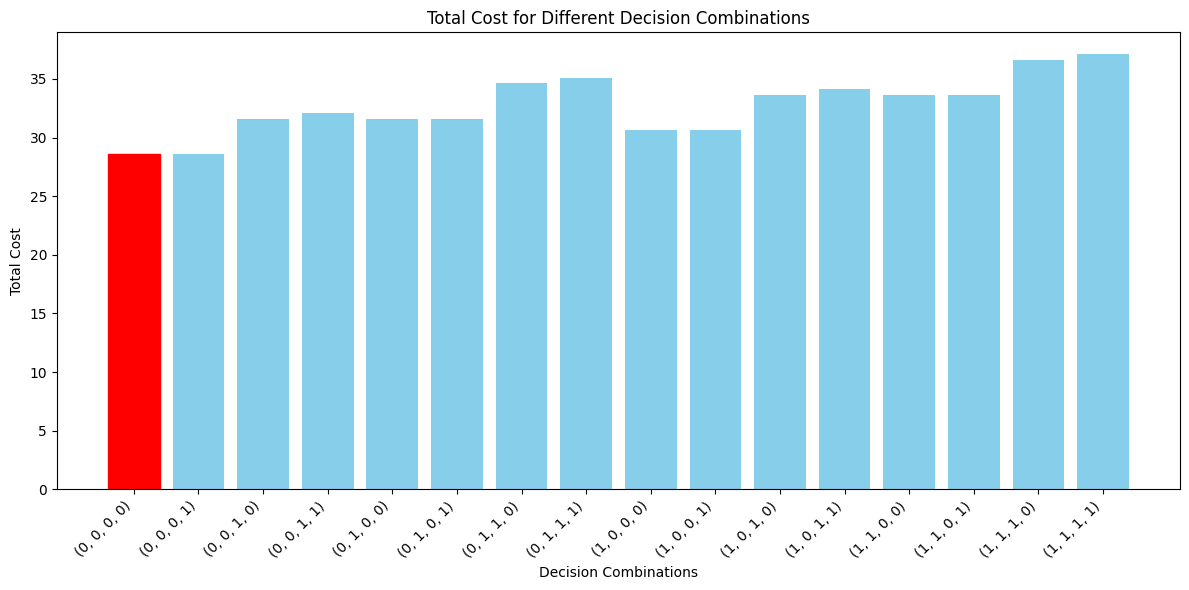

In [3]:
import numpy as np

# Parameters
params = {
    'p1': 0.1008, 'p2': 0.1008, 'c1': 4, 'c2': 18, 'd1': 2, 'd2': 3,
    'pf': 0.1008, 'a': 6, 'df': 3, 's': 56, 'l': 6, 'r': 5
}


import matplotlib.pyplot as plt

# Decision variables
decisions = [0, 1]

# Total cost calculation function
def calculate_total_cost(D1, D2, C, R, params):
    cost_parts = (params['c1'] + params['d1'] * D1) + (params['c2'] + params['d2'] * D2)
    cost_assembly = params['a'] + params['df'] * C
    cost_rework = params['r'] * R * params['pf'] * C
    loss_replacement = params['l'] * params['pf']
    total_cost = cost_parts + cost_assembly + cost_rework + loss_replacement
    return total_cost

# Variables to track minimum cost and best decision
min_cost = np.inf
best_decision = None

print("Decision Combinations and Corresponding Total Costs:")

# Lists to store decision combinations and their total costs for plotting
decision_combinations = []
total_costs = []

# Iterate through all decision combinations and print results
for D1 in decisions:
    for D2 in decisions:
        for C in decisions:
            for R in decisions:
                total_cost = calculate_total_cost(D1, D2, C, R, params)
                print(f"D1: {D1}, D2: {D2}, C: {C}, R: {R}, Total Cost: {total_cost}")
                decision_combinations.append((D1, D2, C, R))
                total_costs.append(total_cost)
                if total_cost < min_cost:
                    min_cost = total_cost
                    best_decision = (D1, D2, C, R)

print(f"\nBest Decision: {best_decision}, Minimum Total Cost: {min_cost}")

# Plotting the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(total_costs)), total_costs, color='skyblue')

# Highlight the bar with the minimum total cost
min_index = total_costs.index(min_cost)
bars[min_index].set_color('red')

plt.xlabel('Decision Combinations')
plt.ylabel('Total Cost')
plt.title('Total Cost for Different Decision Combinations')
plt.xticks(range(len(total_costs)), [f"{dc}" for dc in decision_combinations], rotation=45, ha='right')
plt.tight_layout()
plt.show()
